# Data Extraction and EDA: State Weather Data

In [1]:
import sys
# Append path to import helper modules
sys.path.append("../")


import pandas as pd
import pickle
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from utilities import states_to_abbrev, abbrev_to_states, days_since_20200101

In [2]:
"""
We're using the format of the states for mobility data. So, let's import that to see what
it looks like:
"""

mobility_data = pickle.load(open("../data/us_state_mobility_data.p", "rb"))
required_states = mobility_data["abbrev"].unique()
print(required_states)
display(mobility_data)
print(mobility_data["date"])

['USA' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


,date,state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,abbrev,days_since_20200101
94913,2020-02-15,United States,6.0,2.0,15.0,3.0,2.0,-1.0,USA,45
94914,2020-02-16,United States,7.0,1.0,16.0,2.0,0.0,-1.0,USA,46
94915,2020-02-17,United States,6.0,0.0,28.0,-9.0,-24.0,5.0,USA,47
94916,2020-02-18,United States,0.0,-1.0,6.0,1.0,0.0,1.0,USA,48
94917,2020-02-19,United States,2.0,0.0,8.0,1.0,1.0,0.0,USA,49
...,...,...,...,...,...,...,...,...,...,...
304088,2020-04-28,Wyoming,-21.0,1.0,23.0,-7.0,-33.0,5.0,WY,118
304089,2020-04-29,Wyoming,-18.0,3.0,76.0,-3.0,-34.0,11.0,WY,119
304090,2020-04-30,Wyoming,-20.0,1.0,51.0,-1.0,-35.0,12.0,WY,120
304091,2020-05-01,Wyoming,-20.0,3.0,50.0,5.0,-31.0,12.0,WY,121


94913    2020-02-15
94914    2020-02-16
94915    2020-02-17
94916    2020-02-18
94917    2020-02-19
            ...    
304088   2020-04-28
304089   2020-04-29
304090   2020-04-30
304091   2020-05-01
304092   2020-05-02
Name: date, Length: 4056, dtype: datetime64[ns]


In [3]:
"""
There's a ton of columns, but after reading some stuff up, it looks like
the "dry bulb" temperature is the temperature that is meaningful.
"""
columns = ["STATION", "DATE", "REPORT_TYPE", "SOURCE", "AWND", "BackupDirection", "BackupDistance", "BackupDistanceUnit", "BackupElements", "BackupElevation", "BackupElevationUnit", "BackupEquipment", "BackupLatitude", "BackupLongitude", "BackupName", "CDSD", "CLDD", "DSNW", "DailyAverageDewPointTemperature", "DailyAverageDryBulbTemperature", "DailyAverageRelativeHumidity", "DailyAverageSeaLevelPressure", "DailyAverageStationPressure", "DailyAverageWetBulbTemperature", "DailyAverageWindSpeed", "DailyCoolingDegreeDays", "DailyDepartureFromNormalAverageTemperature", "DailyHeatingDegreeDays", "DailyMaximumDryBulbTemperature", "DailyMinimumDryBulbTemperature", "DailyPeakWindDirection", "DailyPeakWindSpeed", "DailyPrecipitation", "DailySnowDepth", "DailySnowfall", "DailySustainedWindDirection", "DailySustainedWindSpeed", "DailyWeather", "HDSD", "HTDD", "HeavyFog", "HourlyAltimeterSetting", "HourlyDewPointTemperature", "HourlyDryBulbTemperature", "HourlyPrecipitation", "HourlyPresentWeatherType", "HourlyPressureChange", "HourlyPressureTendency", "HourlyRelativeHumidity", "HourlySeaLevelPressure", "HourlySkyConditions", "HourlyStationPressure", "HourlyVisibility", "HourlyWetBulbTemperature", "HourlyWindDirection", "HourlyWindGustSpeed", "HourlyWindSpeed", "MonthlyAverageRH", "MonthlyDaysWithGT001Precip", "MonthlyDaysWithGT010Precip", "MonthlyDaysWithGT32Temp", "MonthlyDaysWithGT90Temp", "MonthlyDaysWithLT0Temp", "MonthlyDaysWithLT32Temp", "MonthlyDepartureFromNormalAverageTemperature", "MonthlyDepartureFromNormalCoolingDegreeDays", "MonthlyDepartureFromNormalHeatingDegreeDays", "MonthlyDepartureFromNormalMaximumTemperature", "MonthlyDepartureFromNormalMinimumTemperature", "MonthlyDepartureFromNormalPrecipitation", "MonthlyDewpointTemperature", "MonthlyGreatestPrecip", "MonthlyGreatestPrecipDate", "MonthlyGreatestSnowDepth", "MonthlyGreatestSnowDepthDate", "MonthlyGreatestSnowfall", "MonthlyGreatestSnowfallDate", "MonthlyMaxSeaLevelPressureValue", "MonthlyMaxSeaLevelPressureValueDate", "MonthlyMaxSeaLevelPressureValueTime", "MonthlyMaximumTemperature", "MonthlyMeanTemperature", "MonthlyMinSeaLevelPressureValue", "MonthlyMinSeaLevelPressureValueDate", "MonthlyMinSeaLevelPressureValueTime", "MonthlyMinimumTemperature", "MonthlySeaLevelPressure", "MonthlyStationPressure", "MonthlyTotalLiquidPrecipitation", "MonthlyTotalSnowfall", "MonthlyWetBulb", "NormalsCoolingDegreeDay", "NormalsHeatingDegreeDay", "REM", "REPORT_TYPE", "SOURCE", "ShortDurationEndDate005", "ShortDurationEndDate010", "ShortDurationEndDate015", "ShortDurationEndDate020", "ShortDurationEndDate030", "ShortDurationEndDate045", "ShortDurationEndDate060", "ShortDurationEndDate080", "ShortDurationEndDate100", "ShortDurationEndDate120", "ShortDurationEndDate150", "ShortDurationEndDate180", "ShortDurationPrecipitationValue005", "ShortDurationPrecipitationValue010", "ShortDurationPrecipitationValue015", "ShortDurationPrecipitationValue020", "ShortDurationPrecipitationValue030", "ShortDurationPrecipitationValue045", "ShortDurationPrecipitationValue060", "ShortDurationPrecipitationValue080", "ShortDurationPrecipitationValue100", "ShortDurationPrecipitationValue120", "ShortDurationPrecipitationValue150", "ShortDurationPrecipitationValue180", "Sunrise", "Sunset", "TStorms", "WindEquipmentChangeDate"]
keep = set(["STATION", "REPORT_TYPE", "SOURCE", "AWND", "DailyAverageDryBulbTemperature", "HourlyRelativeHumidity", "HourlyDryBulbTemperature"])
columns_to_remove = set(columns).difference(keep)


In [4]:
"""
Concat all the government weather data together.
"""
RAW_DATA_DIR = "../data/raw_data/"
csv_data = []

for i in range(1, 8):
    csv_data.append(pd.read_csv(f"{RAW_DATA_DIR}state_weather_{i}.csv"))
    

/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,25,26,27,28,29,30,31,32,35,36,37,41,42,43,44,45,48,49,50,51,52,53,54,55,56,58,59,68,69,71,72,85,88,93,96,97,98,99,100,101,102,103,104,105,106,107,114,117,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,5,7,8,11,14,19,25,26,27,28,29,30,31,32,33,34,35,36,37,41,42,43,44,45,48,49,50,51,52,53,54,55,56,58,59,60,69,71,72,76,88,93,95,96,97,98,99,100,101,102,103,104,105,106,107,117,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

In [5]:
# What one of the weather CSVs look like:
csv_data[0].head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72216013869,2020-01-01T00:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
1,72216013869,2020-01-01T01:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
2,72216013869,2020-01-01T02:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
3,72216013869,2020-01-01T03:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
4,72216013869,2020-01-01T04:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31


In [6]:
states_weather = pd.concat(csv_data, axis=0)
states_weather = states_weather.rename(columns={"STATION": "station_id"})
states_weather["date"] = pd.to_datetime(states_weather["DATE"], infer_datetime_format=True)
states_weather = states_weather.drop(columns=columns_to_remove)

# An entire dataset for Utah is problematic. Drop it.
states_weather = states_weather[states_weather["station_id"] != "A0001603036"]

states_weather["HourlyDryBulbTemperature"] = pd.to_numeric(
    states_weather["HourlyDryBulbTemperature"], errors="coerce"
)
states_weather["HourlyRelativeHumidity"] = pd.to_numeric(
    states_weather["HourlyRelativeHumidity"], errors="coerce"
)
states_weather = states_weather.dropna(subset=["HourlyDryBulbTemperature"])

display(states_weather)

,station_id,REPORT_TYPE,SOURCE,AWND,DailyAverageDryBulbTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,REPORT_TYPE.1,SOURCE.1,date
0,72216013869,FM-15,7,NaN,NaN,40.0,83.0,FM-15,7,2020-01-01 00:53:00
1,72216013869,FM-15,7,NaN,NaN,39.0,82.0,FM-15,7,2020-01-01 01:53:00
2,72216013869,FM-15,7,NaN,NaN,37.0,86.0,FM-15,7,2020-01-01 02:53:00
3,72216013869,FM-15,7,NaN,NaN,37.0,86.0,FM-15,7,2020-01-01 03:53:00
4,72216013869,FM-15,7,NaN,NaN,36.0,89.0,FM-15,7,2020-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...
36257,72365023050,FM-15,6,NaN,NaN,77.0,17.0,FM-15,6,2020-05-06 19:52:00
36258,72365023050,FM-15,6,NaN,NaN,73.0,19.0,FM-15,6,2020-05-06 20:52:00
36259,72365023050,FM-15,6,NaN,NaN,74.0,18.0,FM-15,6,2020-05-06 21:52:00
36260,72365023050,FM-15,6,NaN,NaN,73.0,18.0,FM-15,6,2020-05-06 22:52:00


In [7]:
"""
The text file for the station IDs is formatted by character start,
so we can't just read it with a numpy csv parser or panda.read_csv and a basic delimiter.

The station metadata is global, but we want to extract 
IDS for all of the US states only.
"""

def extract_station_metadata():
    station_df = []
    station_ids = open("../data/raw_data/station_metadata.txt", "r")

    # state start index
    ss_index = 47
    wban_index = 7
    for i, line in enumerate(station_ids):
        # skip header
        if i == 0:
            continue
        state = line[ss_index: ss_index + 3].strip()
        if state.isspace():
            continue
        else:
            # It's a US state. Start parsing.
            wban_id = line[wban_index: wban_index + 6].strip()
            station_meta = line[0:7].strip()
            # Because why not?
            lattitude = line[57:66].strip()
            longitude = line[65:75].strip()
            elevation = line[74:82].strip()
            station_name = line[13:43].strip()
            station_id = f"{station_meta}{wban_id}"
            try:
                # The weather data has the station ID as an integer. 
                # Data types must match up in the join, so throw out anything that's not
                # castable to an int.
                station_id = int(station_id)
            except:
                continue
            row = {
                "wban_id": int(wban_id),
                "state": state,
                "station_meta": station_meta,
                "lattitude": lattitude,
                "longitude": longitude,
                "elevation": elevation,
                "station_name": station_name,
                "station_id": station_id
            }
            station_df.append(row)
    result = pd.DataFrame(station_df)
    return result

station_df = extract_station_metadata()
display(station_df)

,wban_id,state,station_meta,lattitude,longitude,elevation,station_name,station_id
0,99999,,007018,+00.000 +,+000.000 +,+7018.0,WXPOD 7018,701899999
1,99999,,007026,+00.000 +,+000.000 +,+7026.0,WXPOD 7026,702699999
2,99999,,007070,+00.000 +,+000.000 +,+7070.0,WXPOD 7070,707099999
3,99999,,008260,+00.000 +,+000.000 +,+0000.0,WXPOD8270,826099999
4,99999,,008268,+32.950 +,+065.567 +,+1156.7,WXPOD8278,826899999
...,...,...,...,...,...,...,...,...
29703,96405,AK,999999,+60.473 -,-145.354 +,+0025.3,CORDOVA 14 ESE,99999996405
29704,96406,AK,999999,+64.502 -,-154.130 +,+0078.9,RUBY 44 ESE,99999996406
29705,96407,AK,999999,+66.562 -,-159.004 +,+0006.7,SELAWIK 28 E,99999996407
29706,96408,AK,999999,+63.452 -,-150.875 +,+0678.2,DENALI 27 N,99999996408


In [8]:
states_df = states_weather.merge(station_df, left_on="station_id", right_on="station_id")

In [9]:
"""
Now, let's check to be sure there's data for all states. Hopefully we are not missing any!
"""
grouped_states = states_df.groupby(["station_name", "station_id", "state"]).agg(
    {"station_name": "first", "station_id": "first", "state": "first"}
).reset_index(drop=True)

states_list = set(grouped_states["state"].values)


missing_states = set(required_states).difference(set(states_list))
ms_full = [abbrev_to_states[x] for x in list(missing_states)]
print(ms_full)

['United States', 'District of Columbia']


## Note from above that there is no data for DC and "United States"

We must match up the states so that they are in line with what is present in the mobility dataset. There is no weather dataset specifically for DC, so we'll substitute using data from nearby Maryland. Meanwhile, the "United States" as a state is an aggregate calculation across all states, which we'll do later on.

In [10]:
weather_df = states_df.groupby(
    ["state", states_df["date"].dt.year, states_df["date"].dt.month, states_df["date"].dt.day]
).agg({
    "state": "first",
    "date": "first",
    "HourlyDryBulbTemperature": "mean",
    "HourlyRelativeHumidity": lambda x: list(x),
}).rename(columns={"HourlyDryBulbTemperature": "average_temperature"}).reset_index(drop=True)

weather_df["abbrev"] = weather_df["state"]
weather_df["state"] = weather_df["state"].apply(lambda x: abbrev_to_states[x])
weather_df["date"] = weather_df["date"].dt.date

In [11]:
weather_df["average_humidity"] = weather_df["HourlyRelativeHumidity"].apply(
    lambda x: np.nanmean(np.array(x))
)
weather_df = weather_df.drop(columns=["HourlyRelativeHumidity"])
display(weather_df)

/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,state,date,average_temperature,abbrev,average_humidity
0,Alaska,2020-01-01,21.271028,AK,79.766355
1,Alaska,2020-01-02,12.590909,AK,80.386364
2,Alaska,2020-01-03,11.866667,AK,83.986667
3,Alaska,2020-01-04,14.600000,AK,85.381818
4,Alaska,2020-01-05,10.089286,AK,78.035714
...,...,...,...,...,...
6818,Wyoming,2020-05-02,42.972973,WY,74.567568
6819,Wyoming,2020-05-03,44.666667,WY,62.111111
6820,Wyoming,2020-05-04,42.458333,WY,32.958333
6821,Wyoming,2020-05-05,42.500000,WY,42.583333


In [12]:
"""
Since all states need consistent time-series data,
let's check to see what data might missing:
"""
def check_missing_dates(df):
    missing_dates = []
    min_date = df["date"].min()
    for abbrev in required_states:
        if abbrev == "DC" or abbrev == "USA":
            continue
        # Get minimum and maximum date per state.
        max_date = df[df["abbrev"] == abbrev]["date"].max()
        missing_dates_per_state = pd.date_range(start=min_date, end=max_date).difference(
            df[df["abbrev"] == abbrev]["date"].values
        )
        
        if not missing_dates_per_state.values.size == 0:
            print(f"For {abbrev}, missing:")
            print(missing_dates_per_state.values)
            missing_dates.append((abbrev, missing_dates_per_state.values))
    return missing_dates

missing_dates = check_missing_dates(weather_df)

For AZ, missing:
['2020-04-13T00:00:00.000000000']
For HI, missing:
['2020-03-29T00:00:00.000000000']
For TX, missing:
['2020-01-25T00:00:00.000000000']


In [13]:
def impute_missing_dates_sparse(missing_dates, df):
    """
    Imputes a couple of missing dates in the middle of the dataset
    using data from the day prior.
    """
    df = df.copy()
    missing_data = []
    for abbrev, date in missing_dates:
        datec = pd.DatetimeIndex(date)
        datec = datetime.datetime(
            year=datec.year.values[0], 
            month=datec.month.values[0], 
            day=datec.day.values[0]
        ).date()
        
        prev_date = pd.DatetimeIndex([date[0] - np.timedelta64(1, "D")])


        # Now convert to datetime
        prev_date = datetime.datetime(
            year=prev_date.year.values[0], 
            month=prev_date.month.values[0], 
            day=prev_date.day.values[0]
        ).date()
        

        prev_row = df[np.logical_and(df["abbrev"] == abbrev, df["date"] == prev_date)]
        data = {
            "date": datec,
            "state": abbrev_to_states[abbrev],
            "abbrev": abbrev,
            "average_temperature": prev_row["average_temperature"].values[0],
            "average_humidity": prev_row["average_humidity"].values[0],
        }
        missing_data.append(data)
    return pd.concat([df, pd.DataFrame(missing_data)], axis=0).reset_index(drop=True)
        
weather_df_imputed = impute_missing_dates_sparse(missing_dates, weather_df)
display(weather_df_imputed)
missing_dates = check_missing_dates(weather_df_imputed)

,state,date,average_temperature,abbrev,average_humidity
0,Alaska,2020-01-01,21.271028,AK,79.766355
1,Alaska,2020-01-02,12.590909,AK,80.386364
2,Alaska,2020-01-03,11.866667,AK,83.986667
3,Alaska,2020-01-04,14.600000,AK,85.381818
4,Alaska,2020-01-05,10.089286,AK,78.035714
...,...,...,...,...,...
6821,Wyoming,2020-05-05,42.500000,WY,42.583333
6822,Wyoming,2020-05-06,45.583333,WY,42.500000
6823,Arizona,2020-04-13,62.381818,AZ,57.636364
6824,Hawaii,2020-03-29,67.888889,HI,87.000000


In [15]:
"""
Just use Maryland's data for DC.
"""
def create_dc(df):
    df = df.copy()
    min_date = df["date"].min()
    max_date = df["date"].max()
    md_data = []    
    for date in pd.date_range(start=min_date, end=max_date):
        md = df[np.logical_and(df["abbrev"] == "MD", df["date"] == date)]
        data = {
            "date": date.date(),
            "state": "DC",
            "abbrev": "District of Columbia",
            "average_temperature": md["average_temperature"].values[0],
            "average_humidity": md["average_humidity"].values[0],
        }
        md_data.append(data)
    return pd.concat([df, pd.DataFrame(md_data)], axis=0)

weather_df_imputed_with_dc = create_dc(weather_df_imputed)

In [16]:
weather_df_imputed_with_dc

,state,date,average_temperature,abbrev,average_humidity
0,Alaska,2020-01-01,21.271028,AK,79.766355
1,Alaska,2020-01-02,12.590909,AK,80.386364
2,Alaska,2020-01-03,11.866667,AK,83.986667
3,Alaska,2020-01-04,14.600000,AK,85.381818
4,Alaska,2020-01-05,10.089286,AK,78.035714
...,...,...,...,...,...
123,DC,2020-05-03,62.342857,District of Columbia,78.029412
124,DC,2020-05-04,63.166667,District of Columbia,65.551724
125,DC,2020-05-05,51.517241,District of Columbia,66.785714
126,DC,2020-05-06,47.888889,District of Columbia,92.641509


In [17]:

"""
And create a USA state
"""
def create_usa_state(df):
    df = df.copy()
    min_date = df["date"].min()
    max_date = df["date"].max()
    us_data = []    
    for date in pd.date_range(start=min_date, end=max_date):
        all_states = df[df["date"] == date]
        data = {
                    "date": date.date(),
                    "state": "United States",
                    "abbrev": "USA",
                    "average_temperature": np.nanmean(all_states["average_temperature"].values),
                    "average_humidity": np.nanmean(all_states["average_humidity"].values),
                }
        us_data.append(data)
    us_df = pd.DataFrame(us_data)
    return pd.concat([df, us_df], axis=0)

weather_state_usa = create_usa_state(weather_df_imputed_with_dc)
weather_state_usa["date"] = pd.to_datetime(weather_state_usa["date"])

In [21]:
weather_state_usa

,state,date,average_temperature,abbrev,average_humidity,days_since_20200101
0,Alaska,2020-01-01,21.271028,AK,79.766355,0
1,Alaska,2020-01-02,12.590909,AK,80.386364,1
2,Alaska,2020-01-03,11.866667,AK,83.986667,2
3,Alaska,2020-01-04,14.600000,AK,85.381818,3
4,Alaska,2020-01-05,10.089286,AK,78.035714,4
...,...,...,...,...,...,...
123,United States,2020-05-03,64.035423,USA,63.098014,123
124,United States,2020-05-04,60.754273,USA,63.454684,124
125,United States,2020-05-05,58.145306,USA,63.035776,125
126,United States,2020-05-06,57.034050,USA,61.531169,126


In [22]:
"""
And also add column indicating days since COVID started
"""
weather_state_usa = days_since_20200101(weather_state_usa)

In [23]:
# dump to pickle file
pickle.dump(weather_state_usa, open("../data/daily_average_temp_by_state.p", "wb" ))

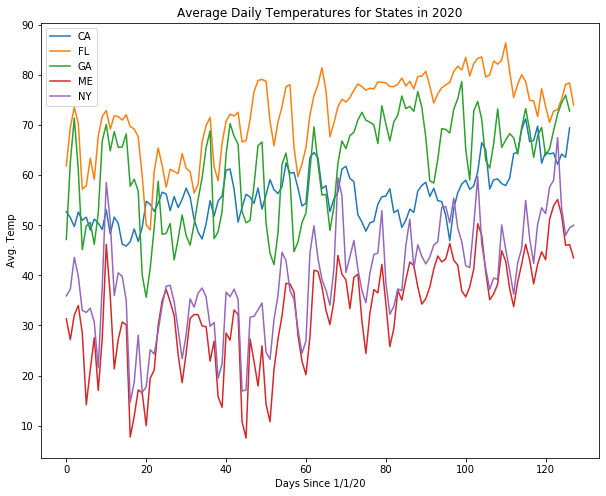

In [20]:
"""
Below is just a plot of the daily temperatures for some states.
"""
plt.figure(figsize=(10, 8))
plt.title("Average Daily Temperatures for States in 2020")
plt.xlabel("Days Since 1/1/20")
plt.ylabel("Avg. Temp")
for state in abbrev_to_states.keys():
    if state in ["NY", "ME", "CA", "GA", "FL"]:
        avg_temps = weather_state_usa[weather_state_usa["abbrev"] == state]["average_temperature"].values
        plt.plot(avg_temps, label=state)
plt.legend()